In [21]:
#importing necessary libaries
try:
    import nltk
    from nltk.tokenize import sent_tokenize, word_tokenize
    from nltk.corpus import stopwords
    print('library imports successful')
except:
    print('Couldnt find libraries... importing')
    !pip install nltk

library imports successful


In [22]:
#reading data from our file
data = ''
with open('raw_speech.txt', 'r', encoding='utf-8') as f:
    data = f.read()
    print('Raw Speech Data Read Successfully')

Raw Speech Data Read Successfully


In [23]:
#tokenizing data into words and sentences
data_words = word_tokenize(data)
data_sent  = sent_tokenize(data)

In [24]:
#removing stop words
stop_words      = set(stopwords.words('english'))
data_words_filt = [w for w in data_words if w not in stop_words]

In [25]:
#getting the parts of speech of the filtered data
try:
    from nltk.tokenize import PunktSentenceTokenizer
    print('Punkt imported successfully')
except:
    nltk.download('tokenize')

Punkt imported successfully


In [26]:
#pos tags
pos_tags = nltk.pos_tag(data_words_filt)

#named entity representaion
namedEntity = nltk.ne_chunk(pos_tags,binary=True)

In [27]:
#putting all nouns, proper nouns and verbs into lists
NOUNS   = [w[0] for w in pos_tags if (w[1] =='NN') and (len(w[0]))>1]
PNOUNS  = [w[0] for w in pos_tags if (w[1] =='NNP') and (len(w[0]))>1]
VERBS   = [w[0] for w in pos_tags if (w[1] =='VB') and (len(w[0]))>1]

In [28]:
#getting all verbs and pro8per nouns
try:
    from nltk.stem.wordnet import WordNetLemmatizer
    print('Wordnet ready!')
except:
    nltk.download('stem')

Wordnet ready!


In [29]:
#lemmatizing all our nouns
lemmatizer = WordNetLemmatizer()

lemmatized = []
for noun in NOUNS:
    lemmatized.append(lemmatizer.lemmatize(noun))

In [30]:
#getting the top most common 10 nouns
from nltk.probability import FreqDist
fdist_nouns  = FreqDist(NOUNS)
fdist_pnouns = FreqDist(PNOUNS)
fdist_verbs  = FreqDist(VERBS)


top_verbs   = fdist_verbs.most_common(20)
top_nouns   = fdist_nouns.most_common(10)
top_pnouns  = fdist_pnouns.most_common(10)

In [31]:
#plotting data
try:
    import matplotlib.pyplot as plt
    print('Matlib ready')
except:
    !pip install matplotlib

Matlib ready


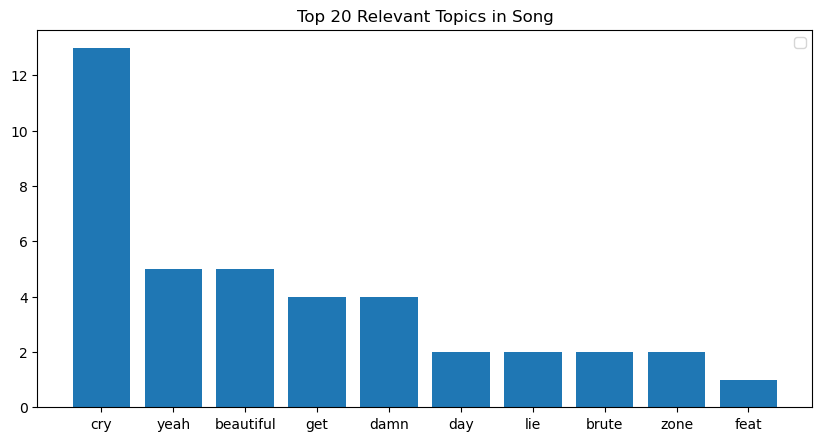

In [42]:
#ploting nouns used
labels = [word[0] for word in top_nouns]
values = [word[1] for word in top_nouns]

plt.figure(figsize=(10,5), dpi=100)
plt.title('Top 20 Relevant Topics in Song')
plt.bar(labels,values)
plt.legend('')
plt.savefig('Nouns')

plt.show()

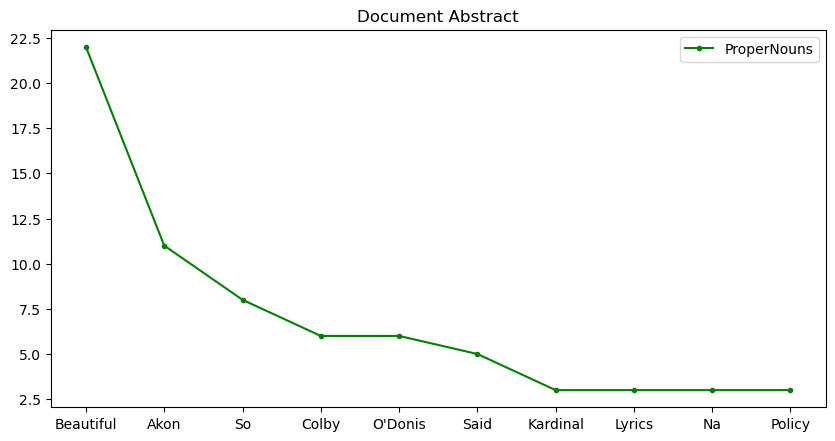

In [33]:
#ploting nouns used
x = [word[0] for word in top_pnouns]
y = [word[1] for word in top_pnouns]

plt.figure(figsize=(10,5), dpi=100)
plt.title('Document Abstract')
plt.plot(x,y,'g.-',label='ProperNouns')
plt.legend()

plt.savefig('properNouns')
plt.show()

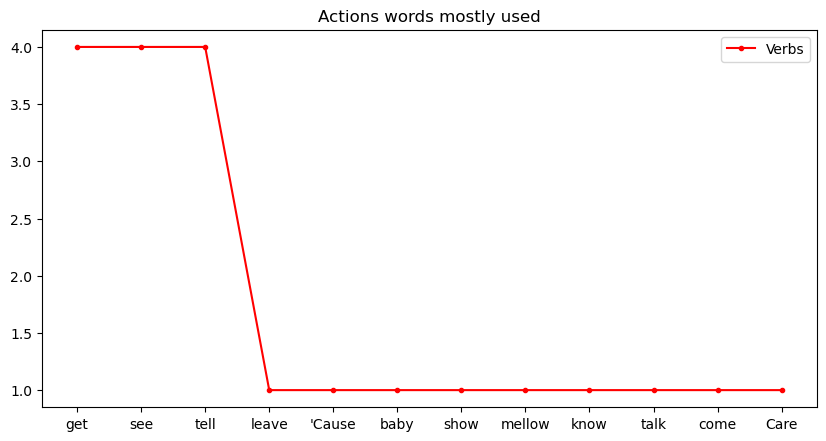

In [43]:
#ploting nouns used
x = [word[0] for word in top_verbs]
y = [word[1] for word in top_verbs]

plt.figure(figsize=(10,5), dpi=100)
plt.title('Actions words mostly used')
plt.plot(x,y,'r.-',label='Verbs')
plt.legend()
plt.savefig('verbs')

plt.show()

In [35]:
#putting the words in frequencies
frequency_table = {}
for word in data_words_filt:
    if(len(word)>1):
        if word not in frequency_table.keys():
            frequency_table[word] = 1
        else:
            frequency_table[word] +=1

max_freq = max(frequency_table.values())

for word in frequency_table.keys():
    frequency_table[word] = frequency_table[word]/max_freq

In [36]:
#Algorithm for scoring a sentence by its word
sentence_weight = dict()

for sentence in data_sent:
    sent_count = len(sentence)
    sent_minus_stops_count = 0;
    for word_weight in frequency_table:
        if word_weight in sentence.lower():
            sent_minus_stops_count = sent_minus_stops_count+1
            if sentence in sentence_weight:
                sentence_weight[sentence] = sentence_weight[sentence] + 1
            else:
                sentence_weight[sentence] = frequency_table[word_weight]
    #sentence_weight[sentence] = sentence_weight[sentence]

In [37]:
#GETTING THE DOCUMENT ABSTRACT... 
import heapq

summary_sentences = heapq.nlargest(7, sentence_weight, key=sentence_weight.get)
summary  =  ' '.join(summary_sentences[1:2])
print(summary)
print("\nLength of Summary ",len(summary))


You're outta this world to me
You're a symbol of what every beautiful woman should be (oh wee) (oh, oh) [Colby O'Donis]
I never wanna see you cry, cry, cry (don't cry)
And I never wanna tell a lie, lie, lie (oh yeah)
Said I never wanna see you cry, cry, cry (oh)
And I never wanna tell a lie, lie, lie (lie) [Akon]
I see you in the club
You gettin' down good
I wanna get with you (ooh yeah)
I see you in the club
You showin' thugs love
I wanna get with you You're so beautiful
So damn beautiful
Said you're so beautiful
So damn beautiful
You're so beautiful Submit Corrections Thanks to Jelly Belly, Hannah Smith, bill, Amanda for correcting these lyrics.

Length of Summary  655


In [38]:
#